# Data analysis and preprocessing

In [43]:
import gc
import re
import data_preprocessing as dpp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auxiliar_functions import extract_info
# global
data_path = '../Data/'

## Lost values

In [4]:
# load and merge data
# important: del and gc calls for performance and memory issues.
df_train = pd.read_csv(data_path + 'train.csv', dtype={'target': np.uint8})
df_members = pd.read_csv(data_path + 'members.csv')
df_merged = df_train.merge(df_members, on='msno', how='left')
del df_train, df_members
gc.collect()
df_songs = pd.read_csv(data_path + 'songs.csv')
df_merged = df_merged.merge(df_songs, on='song_id', how='left')
del df_songs
gc.collect()
df_song_extra = pd.read_csv(data_path + 'song_extra_info.csv', nrows=None)
df_merged = df_merged.merge(df_song_extra, on='song_id', how='left')
del df_song_extra
gc.collect()
print('nrows: {}\n'.format(len(df_merged)))
df_merged.head()

nrows: 7377418



,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [5]:
merged_info = extract_info(df_merged)
merged_info

,null_count,null_percentage,dtypes
msno,0,0.000000,object
song_id,0,0.000000,object
source_system_tab,24849,0.336825,object
source_screen_name,414804,5.622618,object
source_type,21539,0.291959,object
target,0,0.000000,uint8
city,0,0.000000,int64
bd,0,0.000000,int64
gender,2961479,40.142486,object
registered_via,0,0.000000,int64


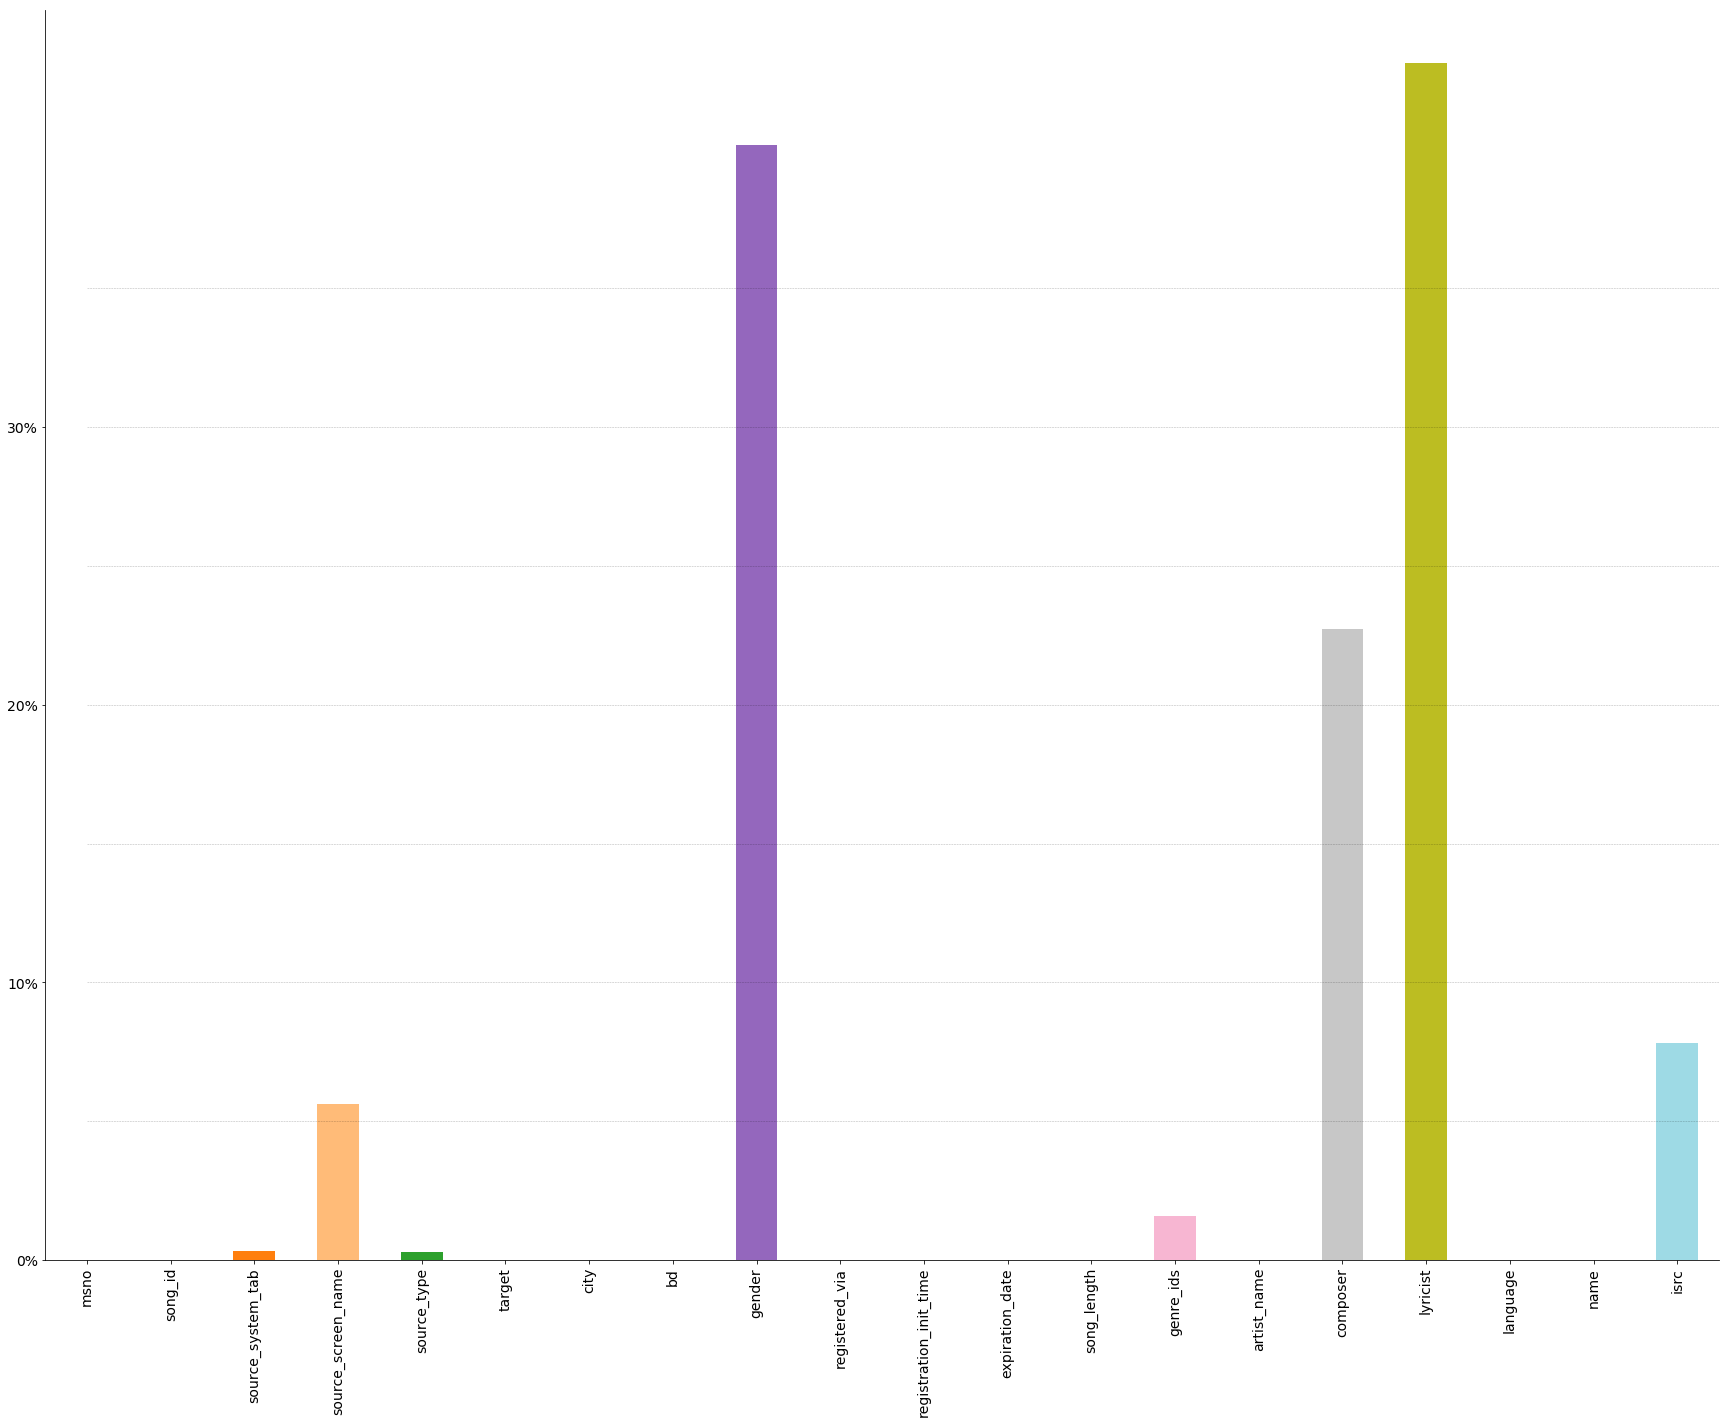

In [6]:
dpp.plot_lost_values_percent(merged_info['null_percentage'])

### Feature analysis: composer and lyricist

In [59]:
s = "patata con| mama;papa; tete,.\\tata\\bebe"
re.split('[\|;,\\\\]', s)

['patata con', ' mama', 'papa', ' tete,.', 'tata', 'bebe']

In [ ]:
a = df_merged['composer'][1:10000].dropna()
a = a.apply(lambda x: re.split('[\|;,\\\\]', str(x).replace(' ', '')))
s = set([item for sublist in a for item in sublist])
a = df_merged['composer'][10000:20000].dropna()
a = a.apply(lambda x: re.split('[\|;,\\\\]', str(x).replace(' ', '')))
s.update([item for sublist in a for item in sublist])
len(s)

In [76]:
df = df_merged['composer'].dropna()
n_rows = len(df)
s = set()

set()

0                                       Dan Smith| Mark Crew
1                                                        NaN
2                       N. Jones、W. Adams、J. Lordan、D. Ingle
3                                              Kwadwo Donkoh
4                    Brett Young| Kelly Archer| Justin Ebach
5                                   Sidney Selby| Adnan Khan
6                              TEDDY| DEE.P| Rebecca Johnson
7                     Thomas Rhett| Rhett Akins| Ben Hayslip
8                                                Ryan Tedder
9                                                Ryan Tedder
10                     Lindsey Stirling| Dia Frampton| SILAS
11                                                        嚴爵
12                                                       林俊傑
13                                                       周杰倫
14                                                    JJ Lin
15                                                     GAEMI
16                      

0                                                        NaN
1                                                        NaN
2                                                        NaN
3                                                        NaN
4                                                        NaN
5                                                        NaN
6                                             TEDDY| TAEYANG
7                                                        NaN
8                                                        NaN
9                                                        NaN
10                                                       NaN
11                                                        嚴爵
12                                                       林怡鳳
13                                                       周杰倫
14                                               Lin Yi Feng
15                                 Ji Hoon/Roco of Rocoberry
16                      